In [34]:
import sys
sys.path.append('../src/')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import json
import scipy
import pickle
import operator
from antenna import Antenna
import itertools
from tqdm import tqdm
from matplotlib import gridspec
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib notebook

In [100]:
with open("../config.json", 'r') as cfg:
    params = json.load(cfg)

antenna_params = params["antenna_params"]
opt_params = params["optimisation_params"]

In [101]:
antenna_params['N'] = 2
antenna_params['beam_resolution'] = 1

In [102]:
antenna = Antenna(antenna_params)

In [111]:
antenna.set_configuration([1, 0])
antenna.set_objective(weights=[1.0, 1.0])

<IPython.core.display.Javascript object>


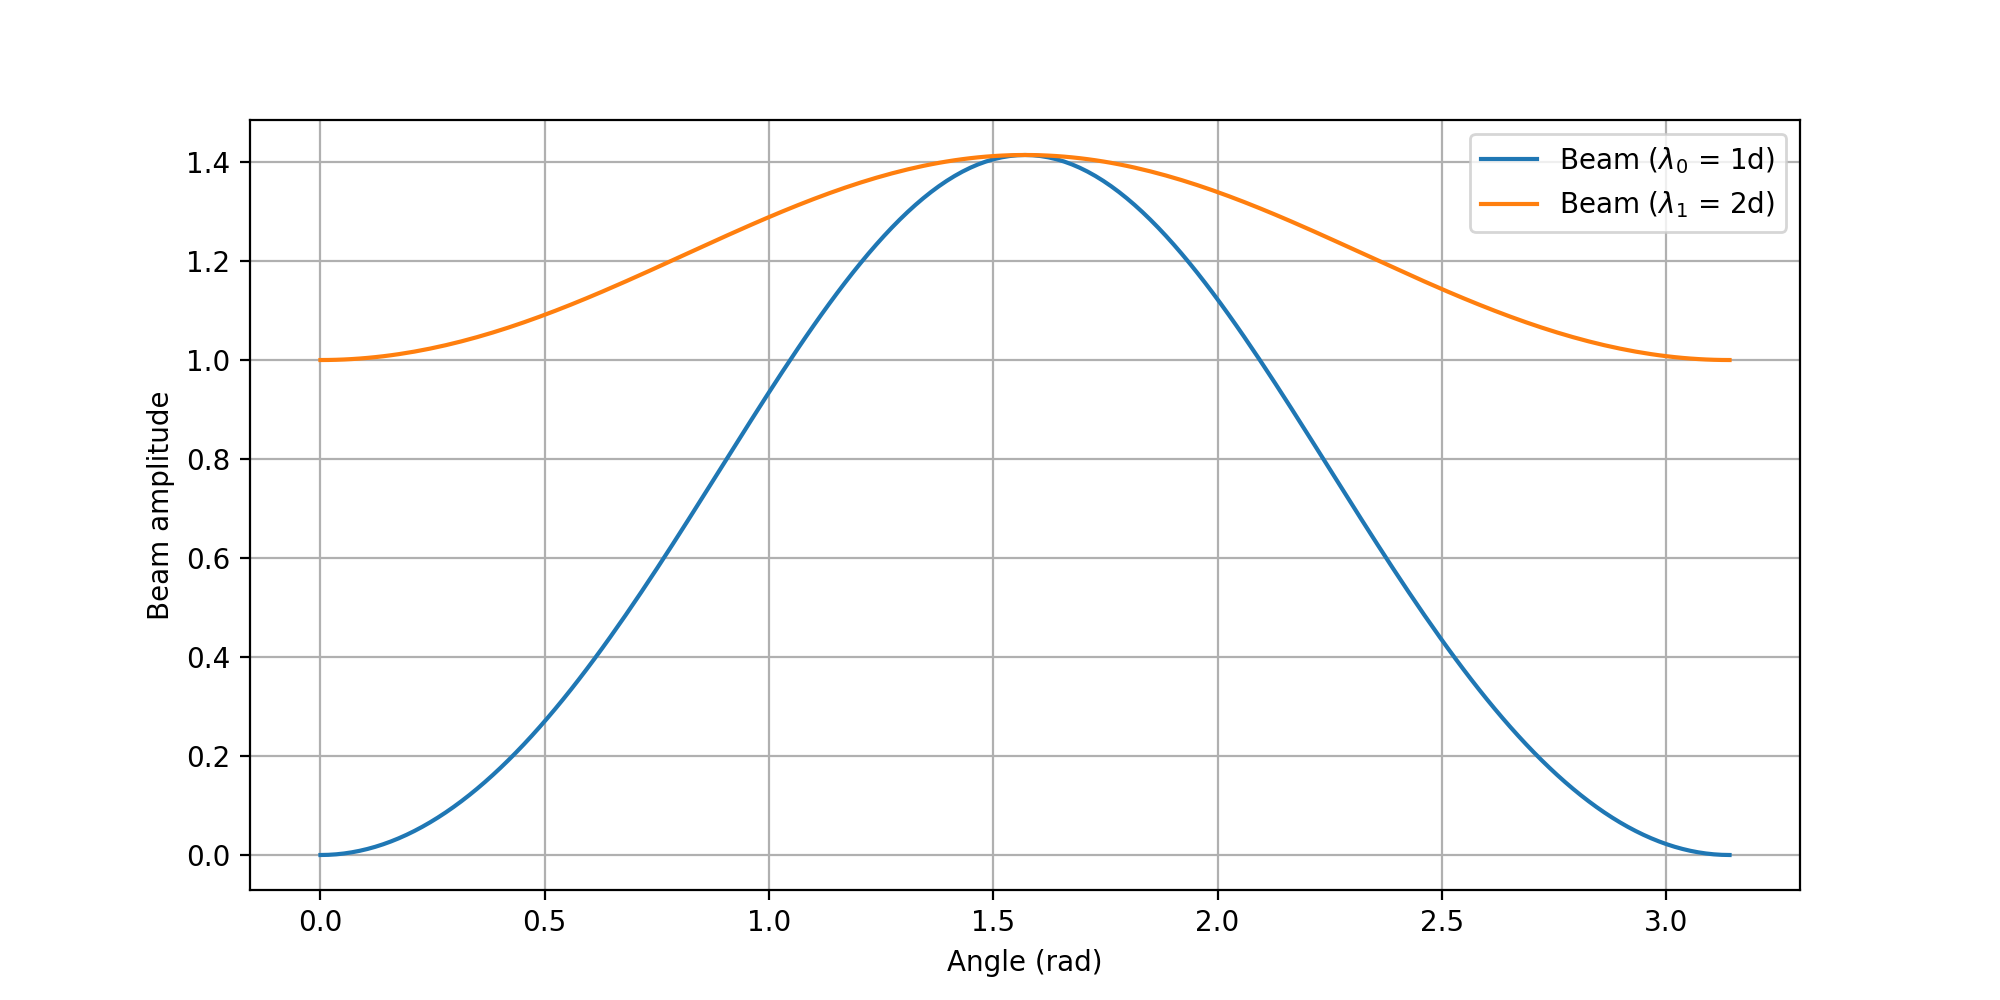

In [112]:
antenna.plot_ref_beams()

In [89]:
# A = scipy.linalg.block_diag(*[antenna.afs[0], antenna.afs[1]])
def c(x, AF, k):
    x = np.array(x).reshape(-1, 1)
    x_exp = np.exp(x).reshape(-1, 1)
    Q_k = np.real(AF[k, :].reshape(1, -1).conj().T @ AF[k, :].reshape(1, -1))
    return x_exp.T@Q_k@x_exp

In [115]:
i1 = np.linspace(-5, 0.5, 100)
i2 = np.linspace(-5, 0.5, 100)

I1, I2 = np.meshgrid(i1, i2)

F = np.zeros_like(I1)
C = np.zeros_like(I1)

for i in range(I1.shape[0]):
    for j in range(I1.shape[0]):
        F[i, j] = antenna.objective([I1[i, j], I2[i, j]])
        C[i, j] = np.linalg.norm(c([I1[i, j], I2[i, j]], antenna.afs[1], 30), 2)**2 + 200

<IPython.core.display.Javascript object>


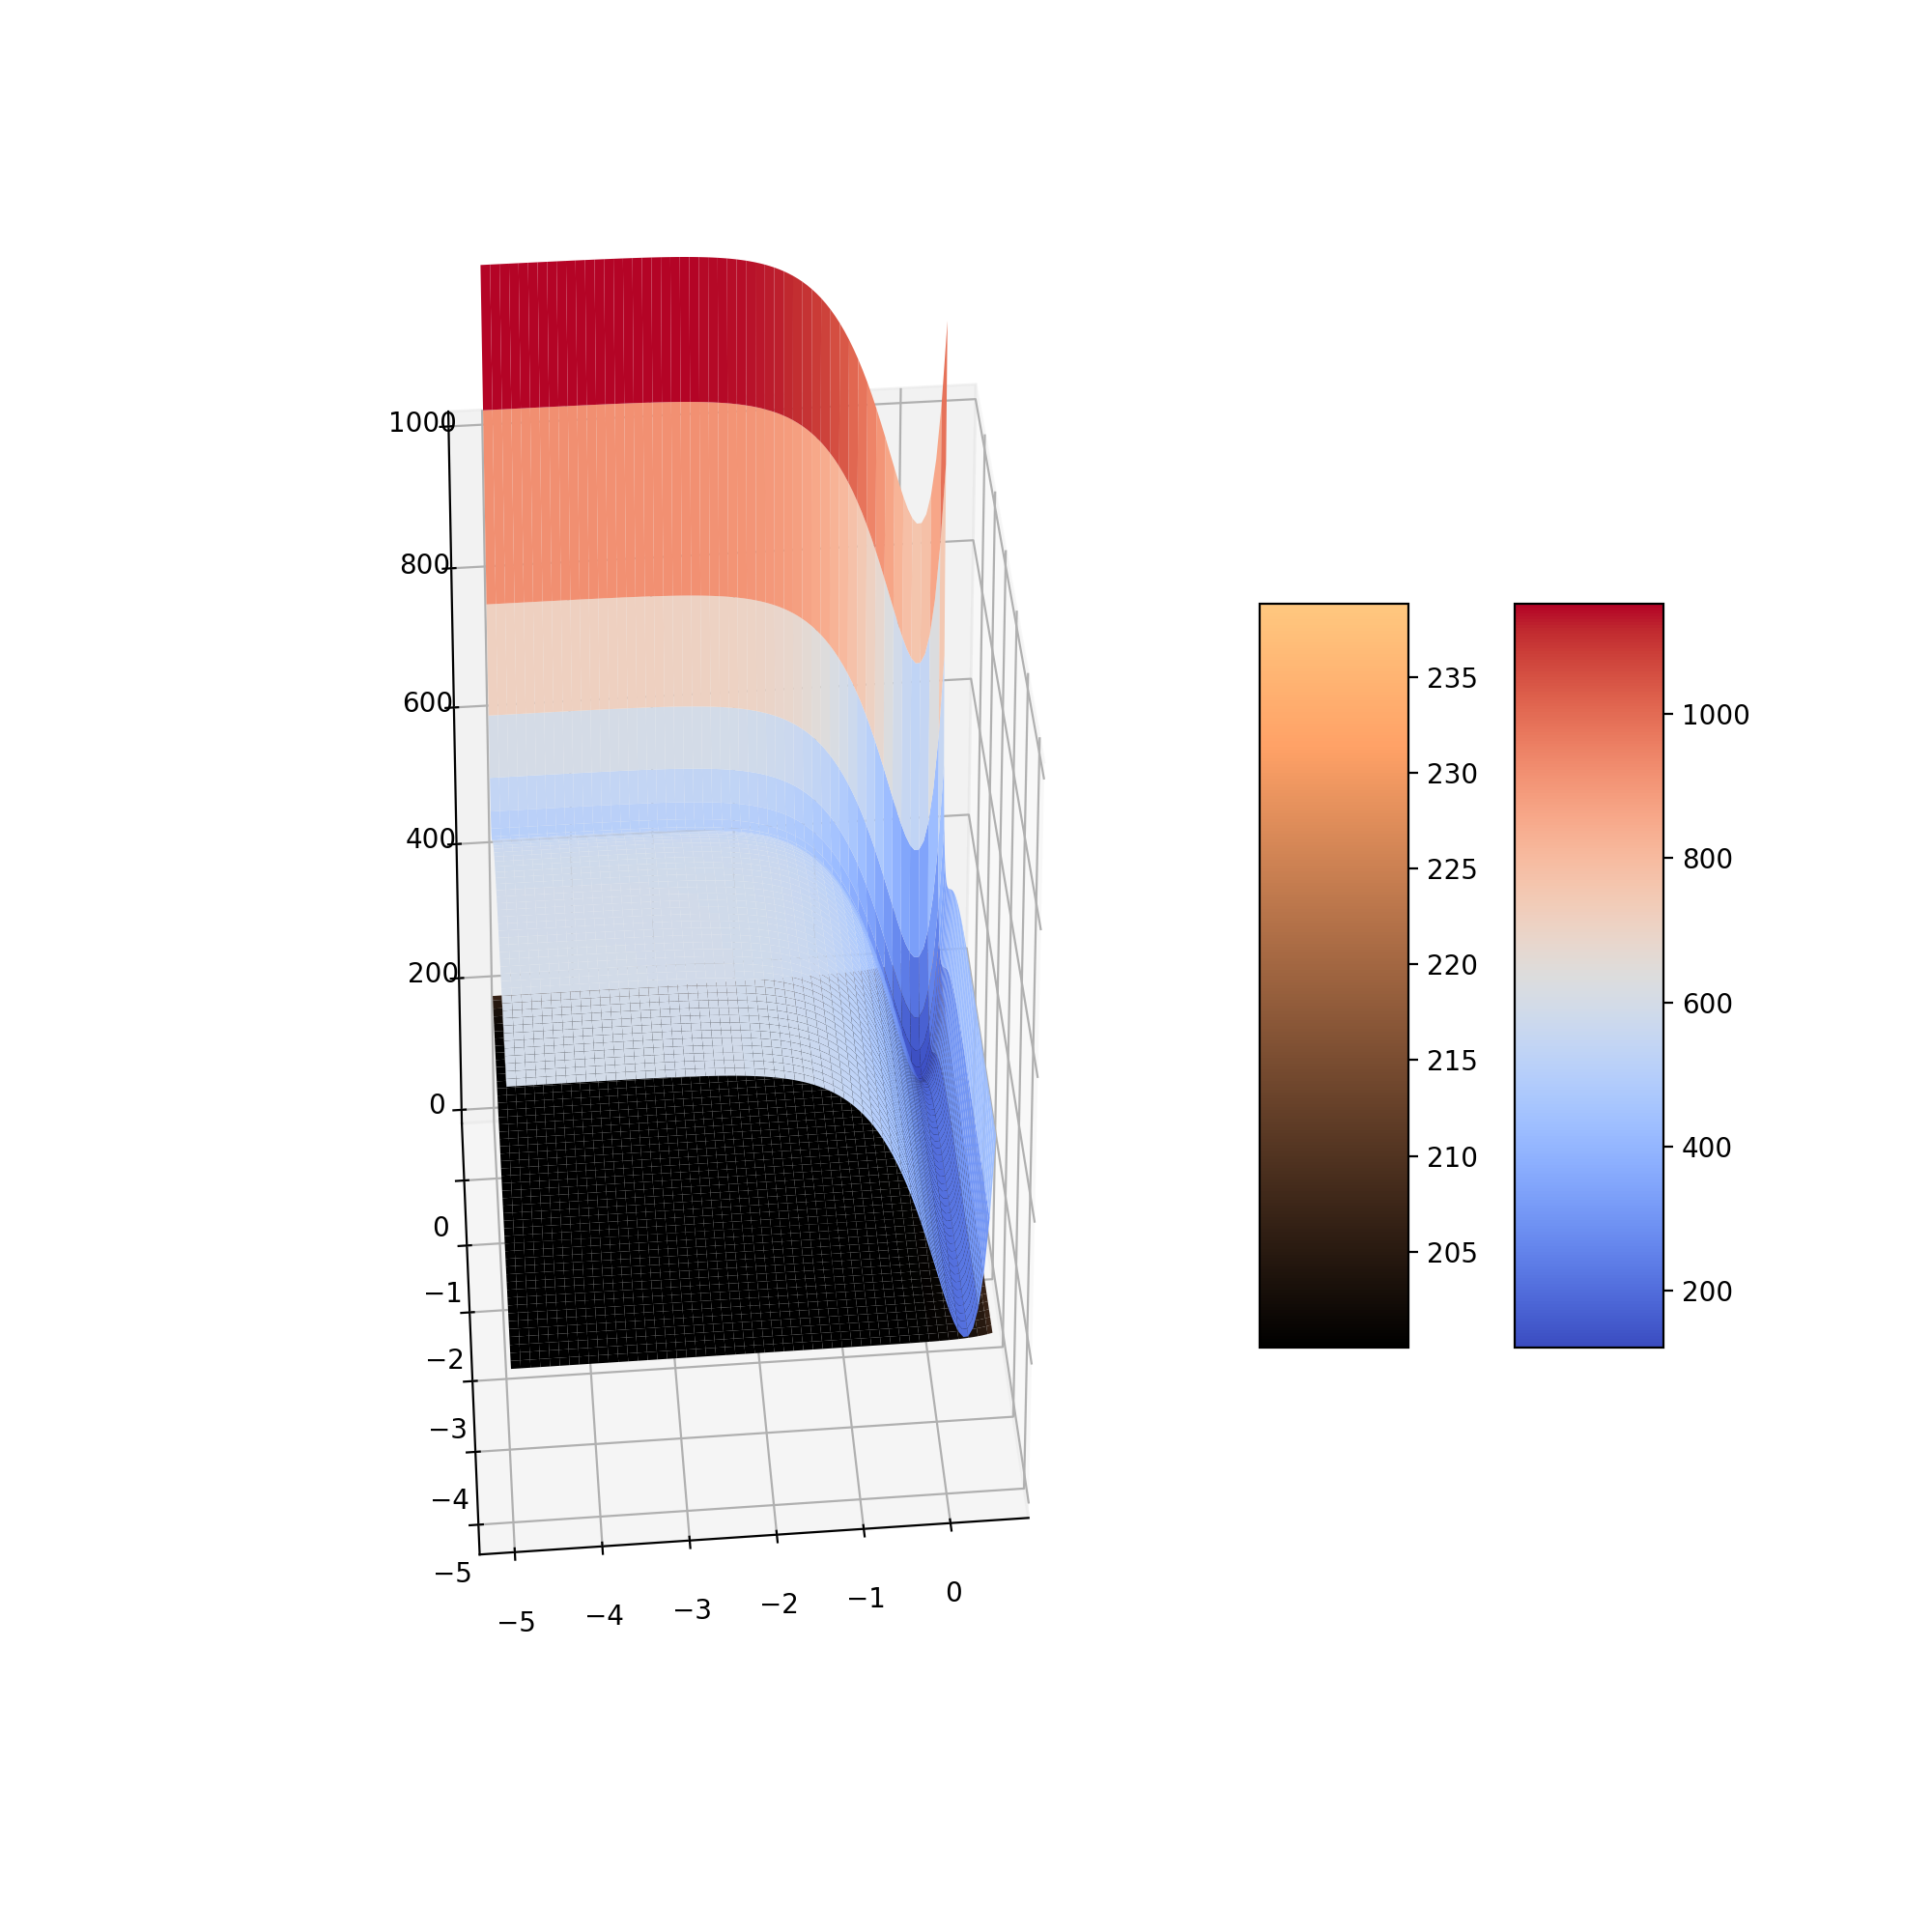

In [116]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(I1, I2, F, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
surf2 = ax.plot_surface(I1, I2, C, cmap=cm.copper,
                       linewidth=0, antialiased=True)

# Customize the z axis.
ax.set_zlim(0, 1000)
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
fig.colorbar(surf2, shrink=0.5, aspect=5)

plt.show()